# 심리 성향 예측 AI 경진대회 - DACON

변수 설명 링크 : https://www.dacon.io/competitions/official/235647/talkboard/401534?page=1&dtype=recent&ptype=pub

## 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px


# 모델링
# LF
from sklearn.ensemble import RandomForestClassifier
# SVM
import sklearn.svm as svm
# XGB
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
# Logistic Reg
from sklearn.linear_model import LogisticRegression
# KNN
from sklearn.neighbors import KNeighborsClassifier

# 테스트
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import roc_auc_score
# 5개의 평가지표 : 정확도, 정밀도, 재현율, f1_score, auc
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


## 2. Load the Data

In [3]:
# os.chdir("/Users/ochan/Desktop/open data/")
# 주소 설정
os.chdir("C:/Users/oxox9/Desktop/open data")
os.getcwd()

'C:\\Users\\oxox9\\Desktop\\open data'

In [4]:
train = pd.read_csv('train.csv')

In [5]:
test_x = pd.read_csv('test_x.csv')

train set과 test set 전처리 한 번에 해주기 위해
all_data : train + test_x

In [6]:
all_data = pd.concat([train, test_x])

In [7]:
all_data

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,...,1,1,0,1,1,0,1,0,1,1
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,...,1,1,1,1,1,1,1,1,1,1
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,...,1,1,0,1,1,0,1,0,1,1
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,...,1,0,0,1,1,0,1,1,1,0


In [8]:
# 변수
all_data.columns

Index(['index', 'QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA',
       'QeE', 'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA',
       'QjE', 'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA',
       'QoE', 'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA',
       'QtE', 'age_group', 'education', 'engnat', 'familysize', 'gender',
       'hand', 'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04',
       'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted',
       'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [9]:
# 결측치 없음 But 무응답 존재  
train.isna().sum().sum()
# 무응답은 투표 여부에 주된 변수로 판단되지 않을 것이라 생각하여 따로 전처리 필요 없,,,맞나,,

0

In [10]:
# 투표 안 함 2->0 변환
all_data['voted'] = all_data['voted'].replace(2,0)
voted = all_data['voted']

In [10]:
pd.set_option('display.max_columns', 100)
all_data

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,0.0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,0.0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1.0,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1.0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1.0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,2.0,438,4.0,378,1.0,1616,3.0,1448,4.0,1886,4.0,852,5.0,872,2.0,526,3.0,381,4.0,818,2.0,736,4.0,828,2.0,1053,2.0,537,4.0,595,20s,3,2,3,Female,1,1,Other,Christian_Catholic,1,0,0,3,0,4,1,0,4,5,0,NaN,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,1.0,414,1.0,637,1.0,1650,1.0,799,5.0,1220,1.0,548,5.0,630,5.0,366,1.0,287,4.0,543,5.0,505,3.0,554,1.0,600,5.0,307,4.0,722,10s,2,2,1,Female,1,1,Asian,Agnostic,2,0,2,0,0,6,0,0,6,4,2,NaN,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,2.0,370,2.0,430,4.0,1630,4.0,863,2.0,1452,4.0,712,4.0,1373,2.0,580,2.0,537,2.0,653,2.0,623,2.0,648,2.0,713,4.0,347,2.0,1171,30s,4,1,4,Male,1,2,White,Atheist,4,2,1,6,1,2,1,6,0,5,1,NaN,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,1.0,525,4.0,1463,1.0,1483,1.0,1113,2.0,883,3.0,2172,5.0,683,1.0,2615,1.0,872,3.0,8006,1.0,878,4.0,515,2.0,4406,4.0,471,2.0,1870,40s,2,1,3,Female,1,2,White,Atheist,4,6,1,6,0,2,1,6,1,5,2,NaN,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0


<font color=blue> 변수 설명</font>

QaA : A 질문에 대한 응답 (1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree.) <br>
QaE : A 질문에 대한 응답 시간<br>
age_group : 연령<br>
education : 교육 수준 (1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답)<br>
engnat : 모국어가 영어 (1=Yes, 2=No, 0=무응답)<br>
familysize : 형제자매 수<br>
gender : 성별 (Male, Female)<br>
hand : 필기하는 손 (1=Right, 2=Left, 3=Both, 0=무응답)<br>
married : 혼인 상태 (1=Never married, 2=Currently married, 3=Previously married, 0=Other)<br>
race : 인종 (Asian, Arab, Black, Indigenous Australian, Native American, White, Other)<br>
religion : 종교 (Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other)<br>


tp__(01~07) : items were rated "I see myself as:" _____ such that <br>
tp01 : Extraverted, enthusiastic.<br>
tp02 : Critical, quarrelsome.<br>
tp03 : Dependable, self-disciplined.<br>
tp04 : Anxious, easily upset.<br>
tp05 : Open to new experiences, complex.<br>
tp06 : Reserved, quiet.<br>
tp07 : Sympathetic, warm.<br>
tp08 : Disorganized, careless.<br>
tp09 : Calm, emotionally stable.<br>
tp10 : Conventional, uncreative.<br>

순서형 변수							



urban : 유년기의 거주 구역 (1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답)<br>
wr_(01-13) : 실존하는 해당 단어의 정의을 앎 (1=Yes, 0=No)<br>
wf_(01-03) : 허구인 단어의 정의를 앎 (1=Yes, 0=No)<br>

<font color=red> voted (타겟): 지난 해 국가 선거 투표 여부 (1=Yes, 2=No)</font>

    

# 데이터 전처리 (변수 정리)

## 1. 마키아벨리즘 테스트 스코어

마키아벨리즘 성향 높음(이하 높은 성향) 분류의 사람들은 다른 사람들과 소통하는 데 있어 보다 계산적이고 신중하게 접근하는 경향이 있다.
<https://ko.wikipedia.org/wiki/%EB%A7%88%ED%82%A4%EC%95%84%EB%B2%A8%EB%A6%AC%EC%A6%98>

* 양과 음의 문항으로 구성되어 있어, 어떤 문항이 음의 문항인지 파악한 후 추가적인 처리를 거쳐 평균 점수 도출<br>
질문 문항이 알려져 있지 않는 번호는 문항들 간의 **'상관관계'**를 이용하여 유추

비어플 피드백 : 마키아벨리즘 스코어 3가지 항목
Tactics, Morality, and Views. <br>
But 3가지 항목 구별하기 어려워보임 <br>
또 결국 20문항 점수 평균으로 미키아벨리즘 테스트 스코어를 산출하므로 3가지 항목 구별할 필요 없어보임
https://dacon.io/competitions/open/235647/talkboard/401557/ 

In [11]:
lst = list(train.columns)

In [12]:
QA = []
for str in lst : 
    if(str.startswith('Q') & str.endswith('A')):
        QA.append(str)
data_QA = all_data[QA]

In [13]:
data_QA.describe()

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
count,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000
mean,2.122498,2.909602,3.662883,1.745902,2.318861,2.171238,2.558851,2.319002,3.158868,3.576983,3.813986,4.326311,3.512589,2.633330,3.222261,3.073373,2.833278,2.826689,3.433541,3.226461
std,1.194201,1.564431,1.431936,1.039907,1.369085,1.350516,1.509756,1.462203,1.480885,1.359815,1.372331,1.149136,1.373086,1.473531,1.475660,1.489156,1.404020,1.424799,1.373340,1.520405
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,5.000000,4.000000,2.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,3.000000,4.000000,5.000000,2.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


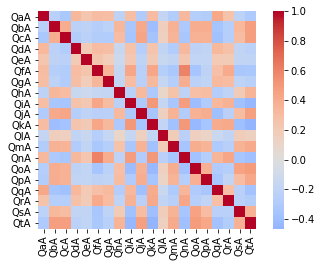

In [14]:
correlations = data_QA.corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [15]:
# 알려져 있는 reverse 변수 6 minus
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    data_QA.loc[:,flip] = 6 - data_QA.loc[:,flip]

C:\Users\oxox9\anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


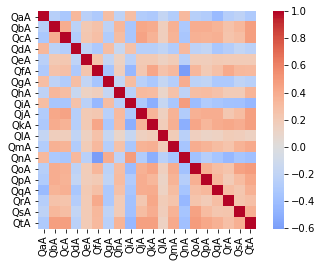

In [16]:
correlations2 = data_QA.corr(method = 'spearman')
sns.heatmap(correlations2, cmap="coolwarm", square=True, center=0)

In [17]:
# "QaA", "QdA", "QgA", "QiA", "QnA" 이렇게 다섯 문항이 -부호를 가진 문항이라는 걸 알 수 있음

In [18]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    data_QA.loc[:,flip] = 6 - data_QA.loc[:,flip]

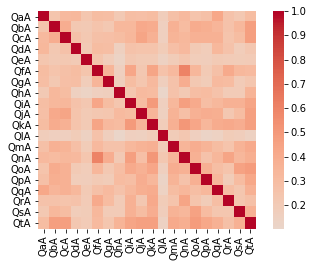

In [19]:
correlations3 = data_QA.corr(method='spearman')
sns.heatmap(correlations3, cmap="coolwarm", square=True, center=0)

In [20]:
# ignore the warning
pd.set_option('mode.chained_assignment',  None)

data_QA.loc[:,'Mack score'] = data_QA.mean(axis=1)

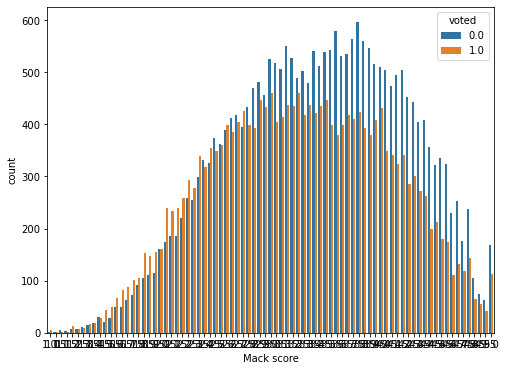

In [21]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_QA[:len(train)], x = 'Mack score', hue = all_data[:len(train)]['voted'])

-> Mack score가 높을 수록 투표율이 떨어짐

## 2. 질문 응답 시간

In [22]:
QE = []
for str in lst : 
    if(str.startswith('Q') & str.endswith('E')):
        QE.append(str)
data_QE = all_data[QE]

In [23]:
data_QE.describe()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
count,5.691500e+04,5.691500e+04,5.691500e+04,5.691500e+04,5.691500e+04,5.691500e+04,5.691500e+04,5.691500e+04,5.691500e+04,5.691500e+04,5.691500e+04,5.691500e+04,5.691500e+04,56915.000000,5.691500e+04,5.691500e+04,5.691500e+04,5.691500e+04,5.691500e+04,5.691500e+04
mean,9.213969e+02,2.226812e+03,2.112839e+03,1.507233e+03,1.901100e+03,1.732913e+03,1.328477e+03,4.072170e+03,4.155097e+03,2.586398e+03,2.123984e+03,3.387120e+03,1.930045e+03,949.028428,1.487754e+03,1.647917e+03,1.150679e+03,2.519753e+03,1.191141e+03,2.133935e+03
std,1.174650e+04,3.768800e+04,1.524435e+05,1.304410e+04,1.666115e+04,6.818332e+04,1.239839e+04,4.490308e+05,1.166025e+05,5.104831e+04,3.755492e+04,3.278244e+05,6.740754e+04,5437.035207,1.411837e+04,2.446765e+04,2.114965e+04,1.378402e+05,8.276441e+03,6.052555e+04
min,2.500000e+01,2.500000e+01,2.500000e+01,2.600000e+01,2.500000e+01,0.000000e+00,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,0.000000e+00,25.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,2.500000e+01,2.500000e+01
25%,4.030000e+02,8.770000e+02,6.520000e+02,6.780000e+02,8.330000e+02,5.040000e+02,5.490000e+02,1.079000e+03,1.257000e+03,8.990000e+02,8.600000e+02,8.050000e+02,6.510000e+02,429.000000,6.380000e+02,7.050000e+02,4.620000e+02,7.940000e+02,5.280000e+02,7.340000e+02
50%,5.570000e+02,1.220000e+03,8.990000e+02,9.300000e+02,1.153000e+03,7.110000e+02,7.730000e+02,1.464000e+03,1.800000e+03,1.259000e+03,1.179000e+03,1.124000e+03,9.080000e+02,596.000000,8.830000e+02,9.690000e+02,6.520000e+02,1.116000e+03,7.500000e+02,1.020000e+03
75%,8.270000e+02,1.834000e+03,1.335000e+03,1.356000e+03,1.654000e+03,1.075000e+03,1.149500e+03,2.089000e+03,2.754000e+03,1.897000e+03,1.721000e+03,1.648000e+03,1.343000e+03,890.000000,1.302000e+03,1.413000e+03,9.820000e+02,1.664000e+03,1.124000e+03,1.526000e+03
max,2.413960e+06,5.580395e+06,3.630804e+07,1.976418e+06,1.919926e+06,1.176370e+07,1.324128e+06,1.070860e+08,1.703586e+07,9.910006e+06,5.855026e+06,7.754351e+07,1.410832e+07,606694.000000,2.135423e+06,4.650742e+06,4.277510e+06,3.159328e+07,1.286581e+06,1.155650e+07


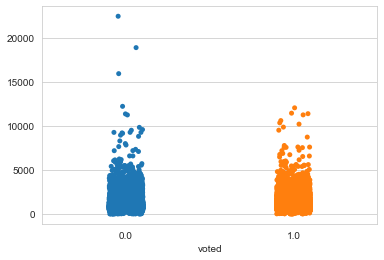

In [24]:
# 이상치가 있어 질문 응답 대기 시간의 중앙값(median)에 따라 투표 여부가 달라지는지 확인 -> 영향 없어보임
sns.set_style('whitegrid')
sns.stripplot(x = all_data[:len(train)]['voted'],
             y =  data_QE[:len(train)].median(axis=1))
plt.show()

## 3. 성향 (열정,예민 -> 5가지 카테고리로 변경)

In [25]:
# 비어플 피드백 : 두 성향 근거와 범주 2개로 설명 부족해지는 점 보완
# 외부 자료 차용
# 열정, 예민 2가지 범주보다 5가지 범주 (아래 변수 참고)로 더 세분화

https://dacon.io/competitions/official/235647/talkboard/401589?page=2&dtype=recent&ptype=pub <br>
초간단 TIPI 성격유형검사 블로그 참고 <br>
https://groow.kr/entry/%EA%B0%9C%EC%9D%B8%EB%B8%8C%EB%9E%9C%EB%93%9C-%EC%B4%88%EA%B0%84%EB%8B%A8-%EC%84%B1%EA%B2%A9%ED%85%8C%EC%8A%A4%ED%8A%B8-TIPI 

경험 개방성(Openness)
(5번점수 + (8 - 10번점수)) ÷ 2

성실성(Conscientiouness)
(3번점수 + (8 - 8번점수)) ÷ 2

외향성(Extroversion)
(1번점수 + (8 - 6번점수)) ÷ 2

친화성(Agreeableness)
(7번점수 + (8 - 2번점수)) ÷ 2

정서 안정성(Neuroticism)
(9번점수 + (8 - 4번점수)) ÷ 2

In [26]:
TP = []
for str in lst : 
    if(str.startswith('tp')):
        TP.append(str)
data_TP = all_data[TP]

In [27]:
data_TP = 7 - data_TP

In [28]:
data_TP.describe()

,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10
count,56915.000000,56915.000000,56915.000000,56915.000000,56915.000000,56915.00000,56915.000000,56915.000000,56915.000000,56915.000000
mean,3.987525,4.380269,5.229412,3.961223,5.661056,4.53225,4.967355,3.490275,4.718879,2.677097
std,2.004603,1.898748,1.683549,2.036828,1.453079,1.99715,1.790536,1.972014,1.847348,1.719935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,4.000000,2.000000,5.000000,3.00000,4.000000,2.000000,3.000000,1.000000
50%,4.000000,5.000000,6.000000,4.000000,6.000000,5.00000,5.000000,3.000000,5.000000,2.000000
75%,6.000000,6.000000,7.000000,6.000000,7.000000,6.00000,6.000000,5.000000,6.000000,4.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000


In [33]:
data_TP = data_TP.replace(0,round(data_TP.mean(axis=0)))
data_TP

,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10
0,5,5,5,6,5,6,5,3,3,4
1,6,6,7,7,6,5,4,3,7,3
2,5,4,6,2,4,3,5,1,6,4
3,5,3,6,6,6,4,6,4,6,4
4,6,6,6,1,7,5,7,1,5,1
...,...,...,...,...,...,...,...,...,...,...
11378,6,7,7,4,7,3,6,7,3,2
11379,5,7,5,7,7,1,7,7,1,3
11380,3,5,6,1,6,5,6,1,7,2
11381,3,1,6,1,7,5,6,1,6,2


In [34]:
data_TP['Openness'] = ((data_TP['tp05'] + (8-data_TP['tp10']))/2)
data_TP['Conscientiouness'] = ((data_TP['tp03'] + (8-data_TP['tp08']))/2)
data_TP['Extroversion'] = ((data_TP['tp01'] + (8-data_TP['tp06']))/2)
data_TP['Agreeableness'] = ((data_TP['tp07'] + (8-data_TP['tp02']))/2)
data_TP['Neuroticism'] = ((data_TP['tp09'] + (8-data_TP['tp04']))/2)

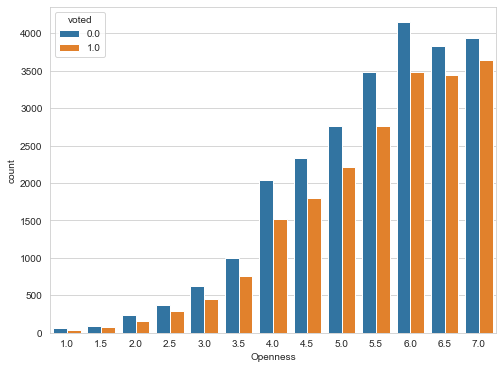

In [35]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_TP[:len(train)], x = 'Openness', hue = all_data[:len(train)]['voted'])

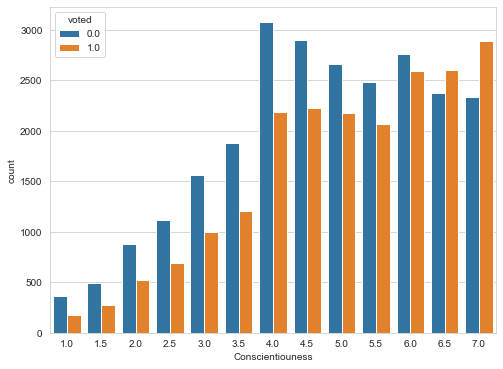

In [36]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_TP[:len(train)], x = 'Conscientiouness', hue = all_data[:len(train)]['voted'])

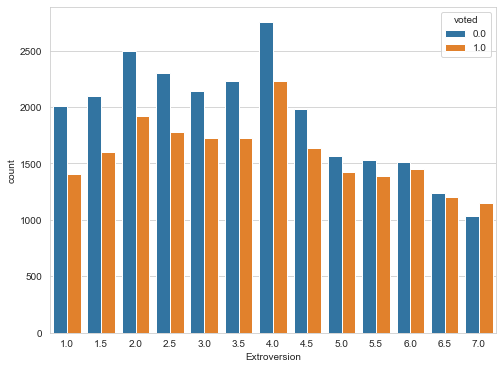

In [37]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_TP[:len(train)], x = 'Extroversion', hue = all_data[:len(train)]['voted'])

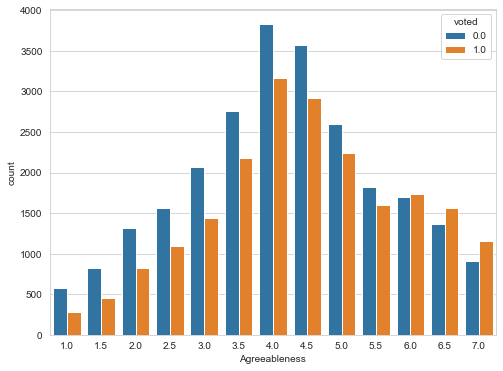

In [38]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_TP[:len(train)], x = 'Agreeableness', hue = all_data[:len(train)]['voted'])

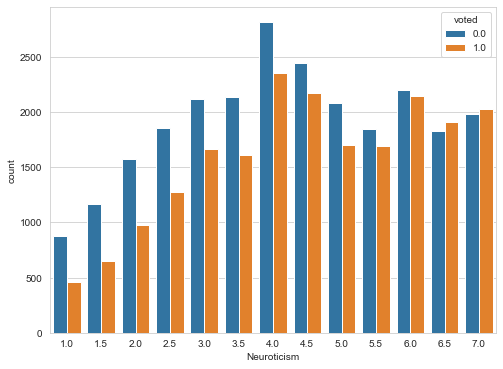

In [39]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_TP[:len(train)], x = 'Neuroticism', hue = all_data[:len(train)]['voted'])

## 4. 허구 단어

In [40]:
# WF : 허구인 단어의 정의를 앎
WF = []
for str in lst : 
    if(str.startswith('wf')):
        WF.append(str)
data_WF = all_data[WF]

In [41]:
# WFcount 변수 추가
data_WF['WFcount'] = data_WF.sum(axis=1)

In [42]:
data_WF

,wf_01,wf_02,wf_03,WFcount
0,0,0,0,0
1,0,0,0,0
2,0,0,1,1
3,0,0,0,0
4,0,1,0,1
...,...,...,...,...
11378,0,0,0,0
11379,0,1,1,2
11380,0,1,1,2
11381,0,0,0,0


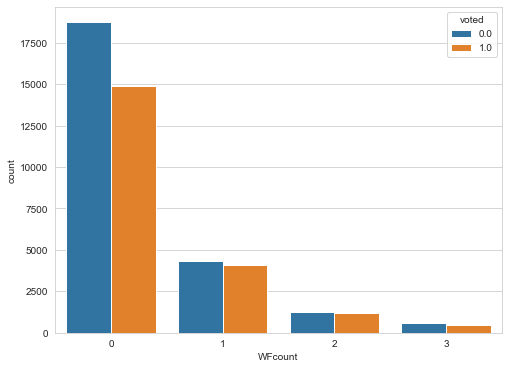

In [43]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_WF[:len(train)], x = 'WFcount', hue = all_data[:len(train)]['voted'])

## 5. 실존 단어

In [44]:
# WR : 실존하는 해당 단어의 정의를 앎## 4. 허구 단어
WR = []
for str in lst : 
    if(str.startswith('wr')):
        WR.append(str)
data_WR = all_data[WR]

In [45]:
# WRcount 변수 추가
data_WR['WRcount'] = data_WR.sum(axis=1)

In [46]:
data_WR

,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,WRcount
0,0,1,0,0,1,0,1,1,0,1,0,1,1,7
1,0,1,0,1,1,0,1,1,0,1,0,1,1,8
2,1,1,0,1,1,0,1,1,1,1,0,1,1,10
3,0,1,0,0,0,0,0,1,0,1,0,1,1,5
4,1,1,0,1,1,1,1,1,0,1,1,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,1,1,0,1,1,0,1,1,0,1,0,1,1,9
11379,1,1,1,1,1,1,1,1,1,1,1,1,1,13
11380,1,1,1,1,1,0,1,1,0,1,0,1,1,10
11381,1,1,0,1,0,0,1,1,0,1,1,1,0,8


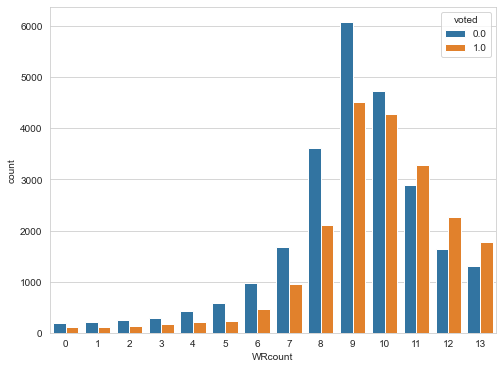

In [47]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_WR[:len(train)], x = 'WRcount', hue = all_data[:len(train)]['voted'])

-> WR이 높을수록 즉, 아는 단어가 많을수록 투표를 한 경향을 보임

## 6. 그 외 변수

In [48]:
# 사용 하지 않는 변수 (ex. religion) 이유 명시하기 (그래프 통해 투표율 차이 없음 보여주기)

In [49]:
data_else = all_data.drop(['index','voted']+QA+QE+TP+WF+WR,axis=1)
data_else

,age_group,education,engnat,familysize,gender,hand,married,race,religion,urban
0,30s,2,1,4,Female,1,3,White,Other,1
1,20s,4,2,3,Female,1,1,Asian,Hindu,3
2,30s,3,1,3,Male,1,2,White,Other,2
3,20s,4,2,0,Female,1,1,Asian,Hindu,3
4,20s,3,1,2,Male,1,2,White,Agnostic,1
...,...,...,...,...,...,...,...,...,...,...
11378,20s,3,2,3,Female,1,1,Other,Christian_Catholic,0
11379,10s,2,2,1,Female,1,1,Asian,Agnostic,2
11380,30s,4,1,4,Male,1,2,White,Atheist,1
11381,40s,2,1,3,Female,1,2,White,Atheist,2


## 6.1 나이 (age)

In [50]:
# 연속형이 아닌 범주형으로 분석하기 위해 더미화 함을 밝히기
# 나이가 많을수록 투표의 오즈가 높아지는 것처럼 방향성을 띄지 않기 때문
### 비어플 피드백에서처럼 10대는 미성년자(투표 권한X) 때문에 투표율이 낮아보임

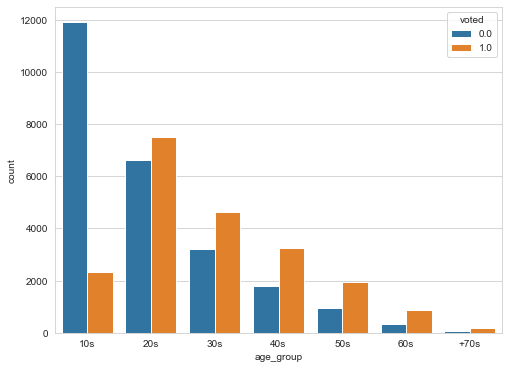

In [51]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_else[:len(train)], x = 'age_group', hue = all_data[:len(train)]['voted'], 
              order = ['10s','20s','30s','40s','50s','60s','+70s'])

-> 특히 10대에서 투표x 빈도 多

In [52]:
# one-hot-encoding
age = pd.get_dummies(data_else['age_group'])
age

,+70s,10s,20s,30s,40s,50s,60s
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
11378,0,0,1,0,0,0,0
11379,0,1,0,0,0,0,0
11380,0,0,0,1,0,0,0
11381,0,0,0,0,1,0,0


## 6.2 교육수준 (education)

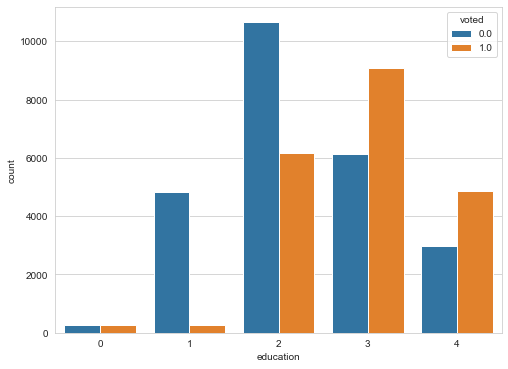

In [53]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_else[:len(train)], x = 'education',  hue = all_data[:len(train)]['voted'])

-> 교육수준이 높아질수록 투표하는 경향

In [54]:
tmp_mat = pd.concat([data_QA['Mack score'],data_TP[['Openness','Conscientiouness','Extroversion','Agreeableness','Neuroticism']],
           data_WR['WRcount'] , data_WF['WFcount'], data_else['education']], axis=1)
tmp_mat[:len(train)].corr(method='spearman')
# euducation 변수는 WRcount 변수와 그나마 상관관계가 있음 (0.22)

,Mack score,Openness,Conscientiouness,Extroversion,Agreeableness,Neuroticism,WRcount,WFcount,education
Mack score,1.000000,0.006824,-0.107291,-0.084837,-0.479717,0.015297,0.069524,0.108831,-0.110785
Openness,0.006824,1.000000,0.041985,0.235482,0.080307,0.102769,0.124328,0.090420,0.057518
Conscientiouness,-0.107291,0.041985,1.000000,0.047452,0.097477,0.284922,0.033755,0.042261,0.154902
Extroversion,-0.084837,0.235482,0.047452,1.000000,0.075580,0.089344,-0.040720,0.035197,0.055941
Agreeableness,-0.479717,0.080307,0.097477,0.075580,1.000000,0.077037,0.002320,-0.058572,0.124336
Neuroticism,0.015297,0.102769,0.284922,0.089344,0.077037,1.000000,0.092467,0.061338,0.095959
WRcount,0.069524,0.124328,0.033755,-0.040720,0.002320,0.092467,1.000000,0.288519,0.217306
WFcount,0.108831,0.090420,0.042261,0.035197,-0.058572,0.061338,0.288519,1.000000,-0.009266
education,-0.110785,0.057518,0.154902,0.055941,0.124336,0.095959,0.217306,-0.009266,1.000000


아는 단어가 13개 중 3개 이하면 교육수준 0 <br>
4개 이상 7개 이하면 교육수준 1 <br>
8개 이상 11개 이하면 교육수준 2 <br>
그 이상은 교육수준 3 매핑

In [55]:
data_else['education'][(data_else['education'] == 0) & (data_WR['WRcount']<=3)] = 1
data_else['education'][(data_else['education'] == 0) & (data_WR['WRcount']<=7)] = 2
data_else['education'][(data_else['education'] == 0) & (data_WR['WRcount']<=10)] = 3
data_else['education'][(data_else['education'] == 0) & (data_WR['WRcount']<=13)] = 4

In [56]:
data_else['education'][:len(train)].value_counts()

2    16906
3    15503
4     8021
1     5102
Name: education, dtype: int64

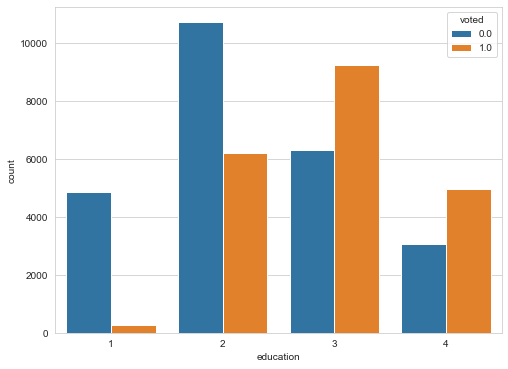

In [57]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_else[:len(train)], x = 'education', hue = all_data[:len(train)]['voted'])

## 6.3 가족 구성원 수 (familysize) * 정정 : 형제,자매 수

In [58]:
data_else['familysize']

0        4
1        3
2        3
3        0
4        2
        ..
11378    3
11379    1
11380    4
11381    3
11382    2
Name: familysize, Length: 56915, dtype: int64

In [59]:
data_else['familysize'][data_else['familysize'] > 10] = 10

familysize가 10보다 큰 경우, 10으로 대체 (maximum 10)

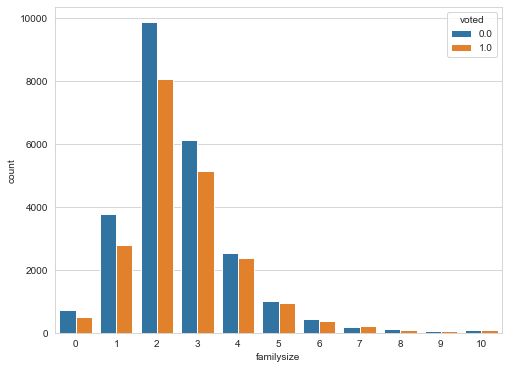

In [60]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_else[:len(train)], x = 'familysize', hue = all_data[:len(train)]['voted'])

## 6.4 성별 (gender)

In [61]:
data_else['gender']

0        Female
1        Female
2          Male
3        Female
4          Male
          ...  
11378    Female
11379    Female
11380      Male
11381    Female
11382    Female
Name: gender, Length: 56915, dtype: object

In [62]:
gender_mapping = {"Male": 0, "Female": 1}
data_else['gender'] = data_else['gender'].map(gender_mapping)

Male -> 0<br>
Female -> 1<br>
Mapping

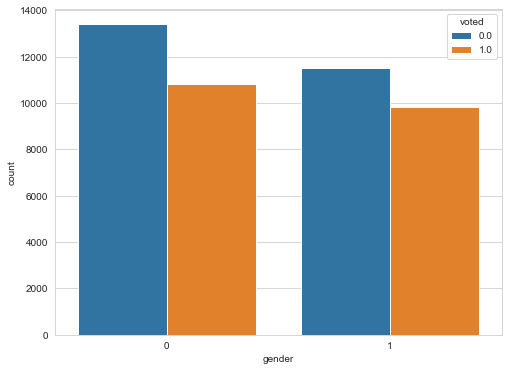

In [63]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_else[:len(train)], x = 'gender', hue = all_data[:len(train)]['voted'])

## 6.5 혼인 상태 (married)

In [64]:
data_else['married']

0        3
1        1
2        2
3        1
4        2
        ..
11378    1
11379    1
11380    2
11381    2
11382    1
Name: married, Length: 56915, dtype: int64

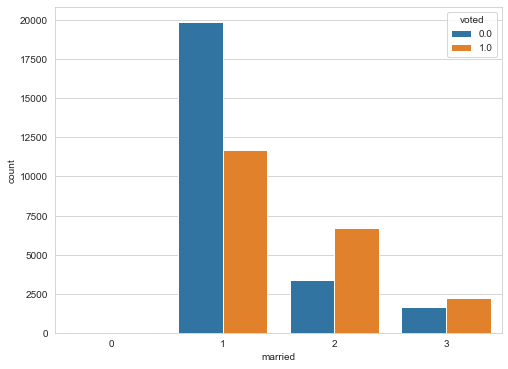

In [65]:
plt.figure(figsize = (8,6))
sns.countplot(data = data_else[:len(train)], x = 'married',hue = all_data[:len(train)]['voted'])

married : 1 (Never married) 즉, 미혼의 경우 투표를 안 하는 사람이 많음

* married 변수에서 '0'은 무응답이 아닌 'Others'이므로 추가적인 값 대체가 필요하지 않아 보임

# Training

In [66]:
data_x = pd.concat([data_QA['Mack score'],age,data_TP[['Openness','Conscientiouness','Extroversion','Agreeableness','Neuroticism']],
                     data_WR['WRcount'] , data_WF['WFcount'],
                    data_else[['education','familysize','gender','married']]], axis=1)
train_x = data_x[:len(train)]
train_x

,Mack score,+70s,10s,20s,30s,40s,50s,60s,Openness,Conscientiouness,Extroversion,Agreeableness,Neuroticism,WRcount,WFcount,education,familysize,gender,married
0,2.95,0,0,0,1,0,0,0,4.5,5.0,3.5,4.0,2.5,7,0,2,4,1,3
1,2.60,0,0,1,0,0,0,0,5.5,6.0,4.5,3.0,4.0,8,0,4,3,1,1
2,1.90,0,0,0,1,0,0,0,4.0,6.5,5.0,4.5,6.0,10,1,3,3,0,2
3,3.35,0,0,1,0,0,0,0,5.0,5.0,4.5,5.5,4.0,5,0,4,0,1,1
4,3.00,0,0,1,0,0,0,0,7.0,6.5,4.5,4.5,6.0,11,1,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,4.15,0,1,0,0,0,0,0,5.0,1.0,6.5,3.5,1.5,10,1,2,1,1,1
45528,3.80,0,0,0,1,0,0,0,6.0,5.0,4.5,3.5,5.0,11,1,2,2,0,1
45529,1.50,0,1,0,0,0,0,0,7.0,4.0,2.5,6.0,5.5,9,0,2,1,1,1
45530,2.90,0,0,0,0,1,0,0,6.0,5.0,4.0,3.5,5.0,10,0,4,2,0,1


In [67]:
train_y = all_data['voted'][:len(train)]
train_y

0        0.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
45527    0.0
45528    0.0
45529    1.0
45530    1.0
45531    1.0
Name: voted, Length: 45532, dtype: float64

In [68]:
train = pd.concat([train_x,train_y],axis=1)
train

,Mack score,+70s,10s,20s,30s,40s,50s,60s,Openness,Conscientiouness,Extroversion,Agreeableness,Neuroticism,WRcount,WFcount,education,familysize,gender,married,voted
0,2.95,0,0,0,1,0,0,0,4.5,5.0,3.5,4.0,2.5,7,0,2,4,1,3,0.0
1,2.60,0,0,1,0,0,0,0,5.5,6.0,4.5,3.0,4.0,8,0,4,3,1,1,0.0
2,1.90,0,0,0,1,0,0,0,4.0,6.5,5.0,4.5,6.0,10,1,3,3,0,2,1.0
3,3.35,0,0,1,0,0,0,0,5.0,5.0,4.5,5.5,4.0,5,0,4,0,1,1,1.0
4,3.00,0,0,1,0,0,0,0,7.0,6.5,4.5,4.5,6.0,11,1,3,2,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,4.15,0,1,0,0,0,0,0,5.0,1.0,6.5,3.5,1.5,10,1,2,1,1,1,0.0
45528,3.80,0,0,0,1,0,0,0,6.0,5.0,4.5,3.5,5.0,11,1,2,2,0,1,0.0
45529,1.50,0,1,0,0,0,0,0,7.0,4.0,2.5,6.0,5.5,9,0,2,1,1,1,1.0
45530,2.90,0,0,0,0,1,0,0,6.0,5.0,4.0,3.5,5.0,10,0,4,2,0,1,1.0


In [69]:
test_x = data_x[len(train):]
test_x

,Mack score,+70s,10s,20s,30s,40s,50s,60s,Openness,Conscientiouness,Extroversion,Agreeableness,Neuroticism,WRcount,WFcount,education,familysize,gender,married
0,2.45,0,1,0,0,0,0,0,5.5,5.0,4.0,3.5,4.0,6,0,2,3,0,1
1,2.80,0,1,0,0,0,0,0,5.5,5.0,3.5,4.5,4.5,0,0,2,2,0,1
2,3.55,0,0,0,1,0,0,0,1.5,3.5,1.5,4.0,2.0,7,0,3,7,0,2
3,3.35,0,0,0,0,0,0,1,7.0,6.0,7.0,6.5,6.5,13,0,4,4,0,2
4,2.90,0,1,0,0,0,0,0,4.0,4.0,1.0,2.0,3.0,10,0,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,3.20,0,0,1,0,0,0,0,6.5,4.0,5.5,3.5,3.5,9,0,3,3,1,1
11379,4.55,0,1,0,0,0,0,0,6.0,3.0,6.0,4.0,1.0,13,2,2,1,1,1
11380,3.15,0,0,0,1,0,0,0,6.0,6.5,3.0,4.5,7.0,10,2,4,4,0,2
11381,3.05,0,0,0,0,1,0,0,6.5,6.5,3.0,6.5,6.5,8,0,2,3,1,2


In [70]:
# 교차검증을 설정
# n_splits=5의 의미는 전체의 4/5은 훈련, 1/5은 테스트 데이터로 사용한다는 의미
# 총 5번의 교차 검증 수행
# random_state : random seed number

kfold = KFold(n_splits=5, random_state=0, shuffle=True)

## 6가지 분류 모델로 테스트 후 auc가 가장 높은 모델을 최종 모델로 선택

In [71]:
# model 1 : Gaussian Naive Bayes

In [72]:
m1_nb = GaussianNB()
res1 = cross_validate(m1_nb, train_x, train_y, scoring="roc_auc", cv=kfold)['test_score'].mean()
print("GaussianNB's auc : ",res1)

GaussianNB's auc :  0.7351912912848919


In [73]:
# model 2 : Logistic Regression

In [74]:
m2_log = LogisticRegression(solver='newton-cg')
res2 = cross_validate(m2_log, train_x, train_y, scoring="roc_auc", cv=kfold)['test_score'].mean()
print("LogisticReg's auc : ",res2)

LogisticReg's auc :  0.739129913581017


In [75]:
# model 3 : k-Nearest Neighbors(kNN)

In [76]:
m3_knn_5 = KNeighborsClassifier(n_neighbors = 5)
m3_knn_10 = KNeighborsClassifier(n_neighbors = 10)
m3_knn_30 = KNeighborsClassifier(n_neighbors = 30)

tmp1 = cross_validate(m3_knn_5, train_x, train_y, scoring="roc_auc", cv=kfold)['test_score'].mean()
tmp2 = cross_validate(m3_knn_10, train_x, train_y, scoring="roc_auc", cv=kfold)['test_score'].mean()
tmp3 = cross_validate(m3_knn_30, train_x, train_y, scoring="roc_auc", cv=kfold)['test_score'].mean()
res3 = max(tmp1,tmp2,tmp3)

print("KNN's auc : ",res3)

KNN's auc :  0.7200308142745813


In [77]:
# model 4 : randomForest

In [78]:
m4_rf = RandomForestClassifier(n_estimators=10)
res4 = cross_validate(m4_rf, train_x, train_y, scoring="roc_auc", cv=kfold)['test_score'].mean()
print("RF's auc : ",res4)

RF's auc :  0.7083512024579026


In [79]:
# model 5 : SVM

In [80]:
m5_svc = svm.SVC(kernel='rbf')
res5 = cross_validate(m5_svc, train_x, train_y, scoring="roc_auc", cv=kfold)['test_score'].mean()
print("SVM's auc : ",res5)

SVM's auc :  0.7384161459386062


In [81]:
# model 6 : XGBoost

In [82]:
m6_gb = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05, use_label_encoder=False)
res6 = cross_validate(m6_gb, train_x, train_y, scoring="roc_auc", cv=kfold)['test_score'].mean()
print("XGBoost's auc",res6)

[23:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [83]:
pd.DataFrame({'Model':['GaussianNB', 'LogisticReg', 'KNN','RF','SVM','XGBoost'],'AUC':[res1,res2,res3,res4,res5,res6]})
# XGBoost 사용

,Model,AUC
0,GaussianNB,0.735191
1,LogisticReg,0.739130
2,KNN,0.720031
3,RF,0.708351
4,SVM,0.738416
5,XGBoost,0.748270


## Hyper Parameter of XGBoost

최종 모형을 XGBoost로 선정하고, auc를 최대로 하기 위한 모수를 찾기

In [84]:
xgb = XGBClassifier()

In [85]:
# grid search (하이퍼 파라미터 서치)
# 아래 파라미터, 예를 들어 learning_rate(학습률)의 경우 0.1일때, 0.2일때 0.3일때 모두 모형을 만들어보고
# 언제 auc 값이 최대가 되는지 그 때의 learning_rate는 몇 인지 찾기 위함
# 시간 오래 소요

In [86]:
xgb_param_grid={'booster' :['gbtree'],
                'learning_rate':[0.1,0.2,0.3],
                 'silent':[True],
                 'max_depth':[5,6,8],
                 'min_child_weight':[1,3,5],
                 'gamma':[0,1,2,3],
                 'nthread':[4],
                 'colsample_bytree':[0.5,0.8],
                 'colsample_bylevel':[0.9],
                 'n_estimators':[50,100],
                 'objective':['binary:logistic'],
                 'random_state':[1]}

In [87]:
gcv=GridSearchCV(xgb, param_grid=xgb_param_grid, cv=kfold, scoring='roc_auc', n_jobs=4)

In [ ]:
gcv.fit(train_x,train_y)
print('final params', gcv.best_params_)
print('best score', gcv.best_score_)

In [13]:
gcv.best_params_

NameError: name 'gcv' is not defined

In [ ]:
# 최적의 파라미터
model= gcv.best_estimator_
model

In [ ]:
# 변수 중요도
plot_importance(model, max_num_features=10) # top 10 most important features
plt.show()

In [ ]:
# 최적의 파라미터로 xgboost 모델 생성 : 최적의 파라미터로 모델링

pred_Y_mean = np.zeros([test_x.shape[0]])

for tidx, vidx in kfold.split(train):
    print('predict with KFold')
    train_cv = train.iloc[tidx] 
    val_cv = train.iloc[vidx]
    
    train_X = train_cv.loc[:,train.columns !='voted']
    train_Y = train_cv.loc[:,'voted':]
    
    val_X = val_cv.loc[:,train.columns !='voted']
    val_Y = val_cv.loc[:,'voted':]

# 각각의 데이터로 xgboost모델로 학습.
    model.fit(train_X, train_Y, eval_set=[(val_X,val_Y)], early_stopping_rounds=50, verbose=5)
    cross_validate(model, train_x, train_y, scoring="roc_auc", cv=kfold)['test_score'].mean()

# 예측
    pred_Y = model.predict(test_x)
    print(pred_Y)
    pred_Y_mean = pred_Y_mean + pred_Y 


In [ ]:
pred_voted=((pred_Y_mean/5.0)>0.5).astype(int)
answer = all_data[len(train):]
answer['pred'] = 2-pred_voted

In [ ]:
# 최종 예측값
answer

In [ ]:
answer['pred'].value_counts()

In [ ]:
answer

## Submit

In [ ]:
sub = pd.read_csv('sample_submission.csv')

In [ ]:
sub['voted'] = answer['pred']

In [ ]:
sub

In [ ]:
sub.to_csv('submit.csv')